# **Project Name**    - Online Retail Customer Segmentation.



##### **Project Type**    - Unsupervised
##### **Contribution**    - Individual
##### **Name -** Aman Sharma

# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


In this project, your task is to identify major customer segments on a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail. The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers. rfm_model

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

In [ ]:
!pip install yellowbrick

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## ***1. Know Your Data***

### Import Libraries

In [112]:
# Import Libraries

import numpy as np
import pandas as pd
from numpy import math

from datetime import datetime

import seaborn as sns
import plotly.express as x
import plotly.graph_objs as go
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

import scipy.stats as stats
from scipy.stats import chi2_contingency

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer,SilhouetteVisualizer
import scipy.cluster.hierarchy as sch
from sklearn.cluster import DBSCAN 
from sklearn.cluster import AgglomerativeClustering
from sklearn.mixture import GaussianMixture

import warnings
warnings.filterwarnings('ignore')


### Dataset Loading

In [ ]:
# Mount Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load Dataset
dataset =pd.read_csv('/content/drive/MyDrive/Data/Online Retail.csv')

In [ ]:
# Creating a copy named df from dataset
df = dataset.copy()

### Dataset First View

In [ ]:
# Dataset First Look
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
df.shape

(541909, 8)

### Dataset Information

In [ ]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
df[df.duplicated()].count()

InvoiceNo      5268
StockCode      5268
Description    5268
Quantity       5268
InvoiceDate    5268
UnitPrice      5268
CustomerID     5225
Country        5268
dtype: int64

In [ ]:
# Droping duplicate values from the dataset
df.drop_duplicates(inplace = True)

In [ ]:
# Checking rows and columns after droping duplicate values.
df.shape

(536641, 8)

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135037
Country             0
dtype: int64

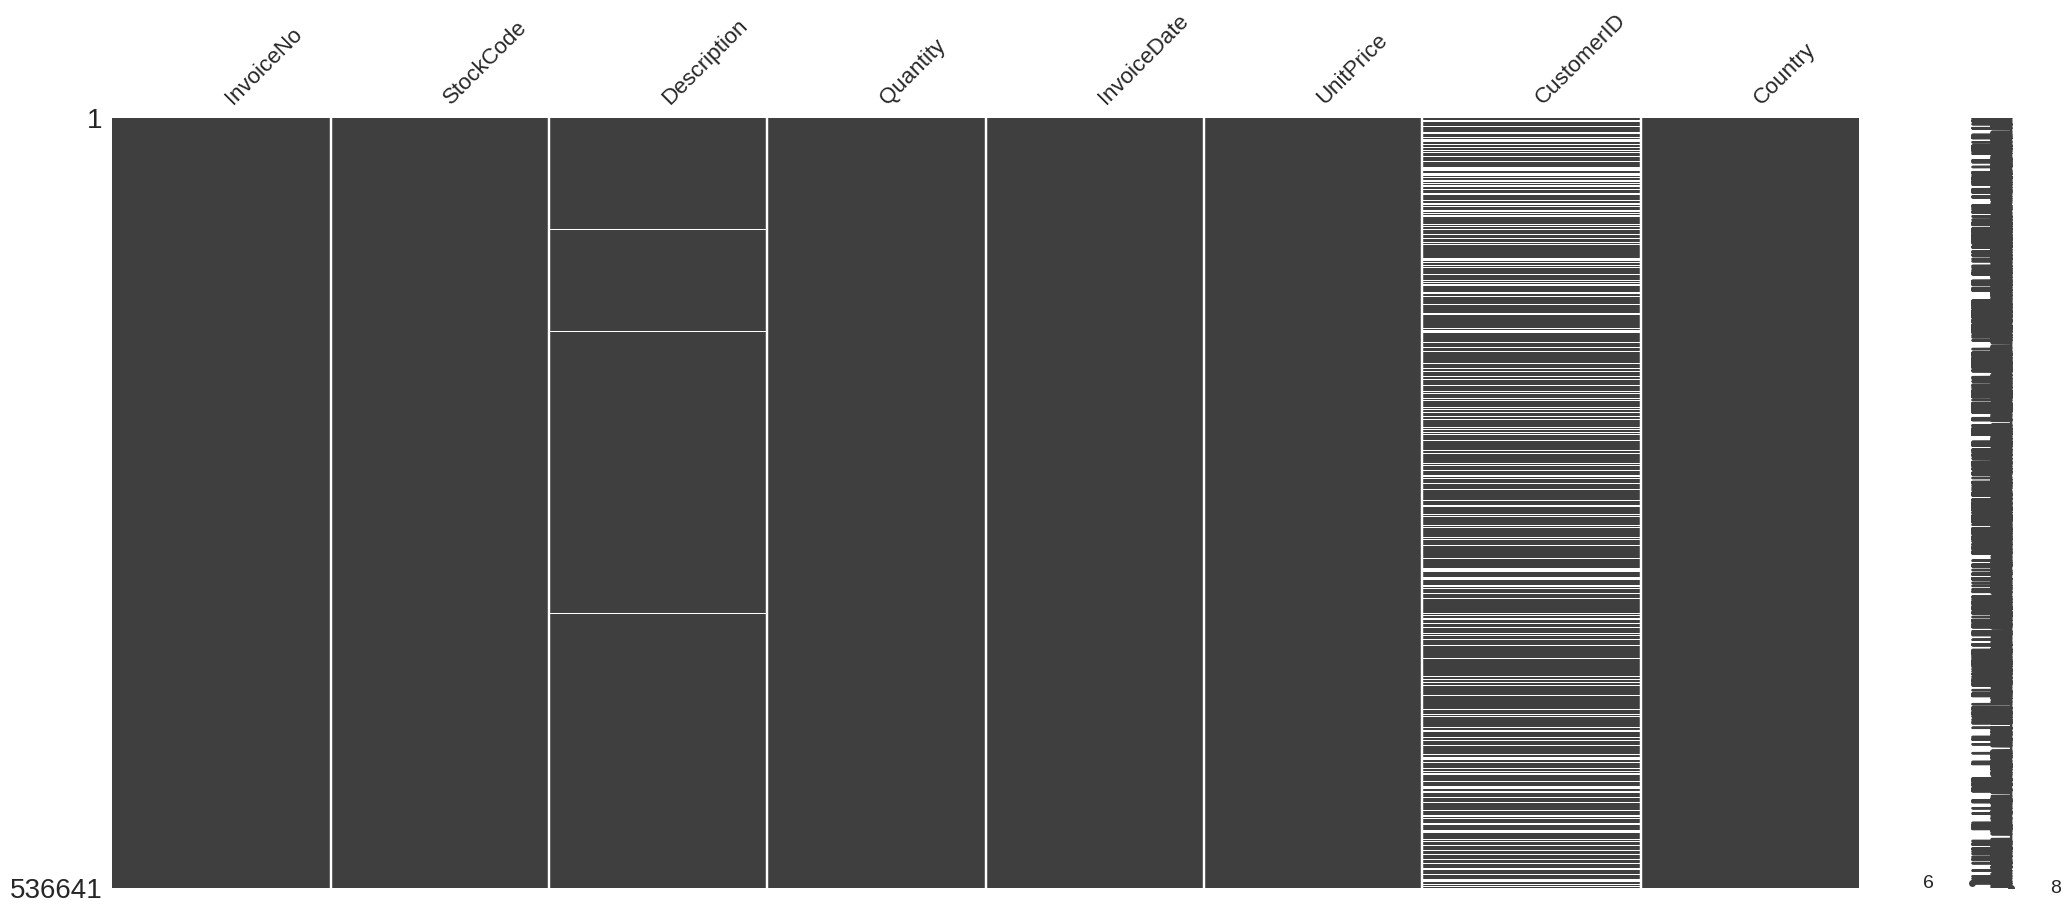

In [ ]:
# Visualizing the missing values
import missingno as msno
msno.matrix(df)
plt.show()

In [ ]:
# Removeing cancelled order form dataset.
df['InvoiceNo'] = df['InvoiceNo'].astype('str')
df=df[~df['InvoiceNo'].str.contains('C')]

In [ ]:
# droping NaN values 
df= df.dropna(axis = 0)

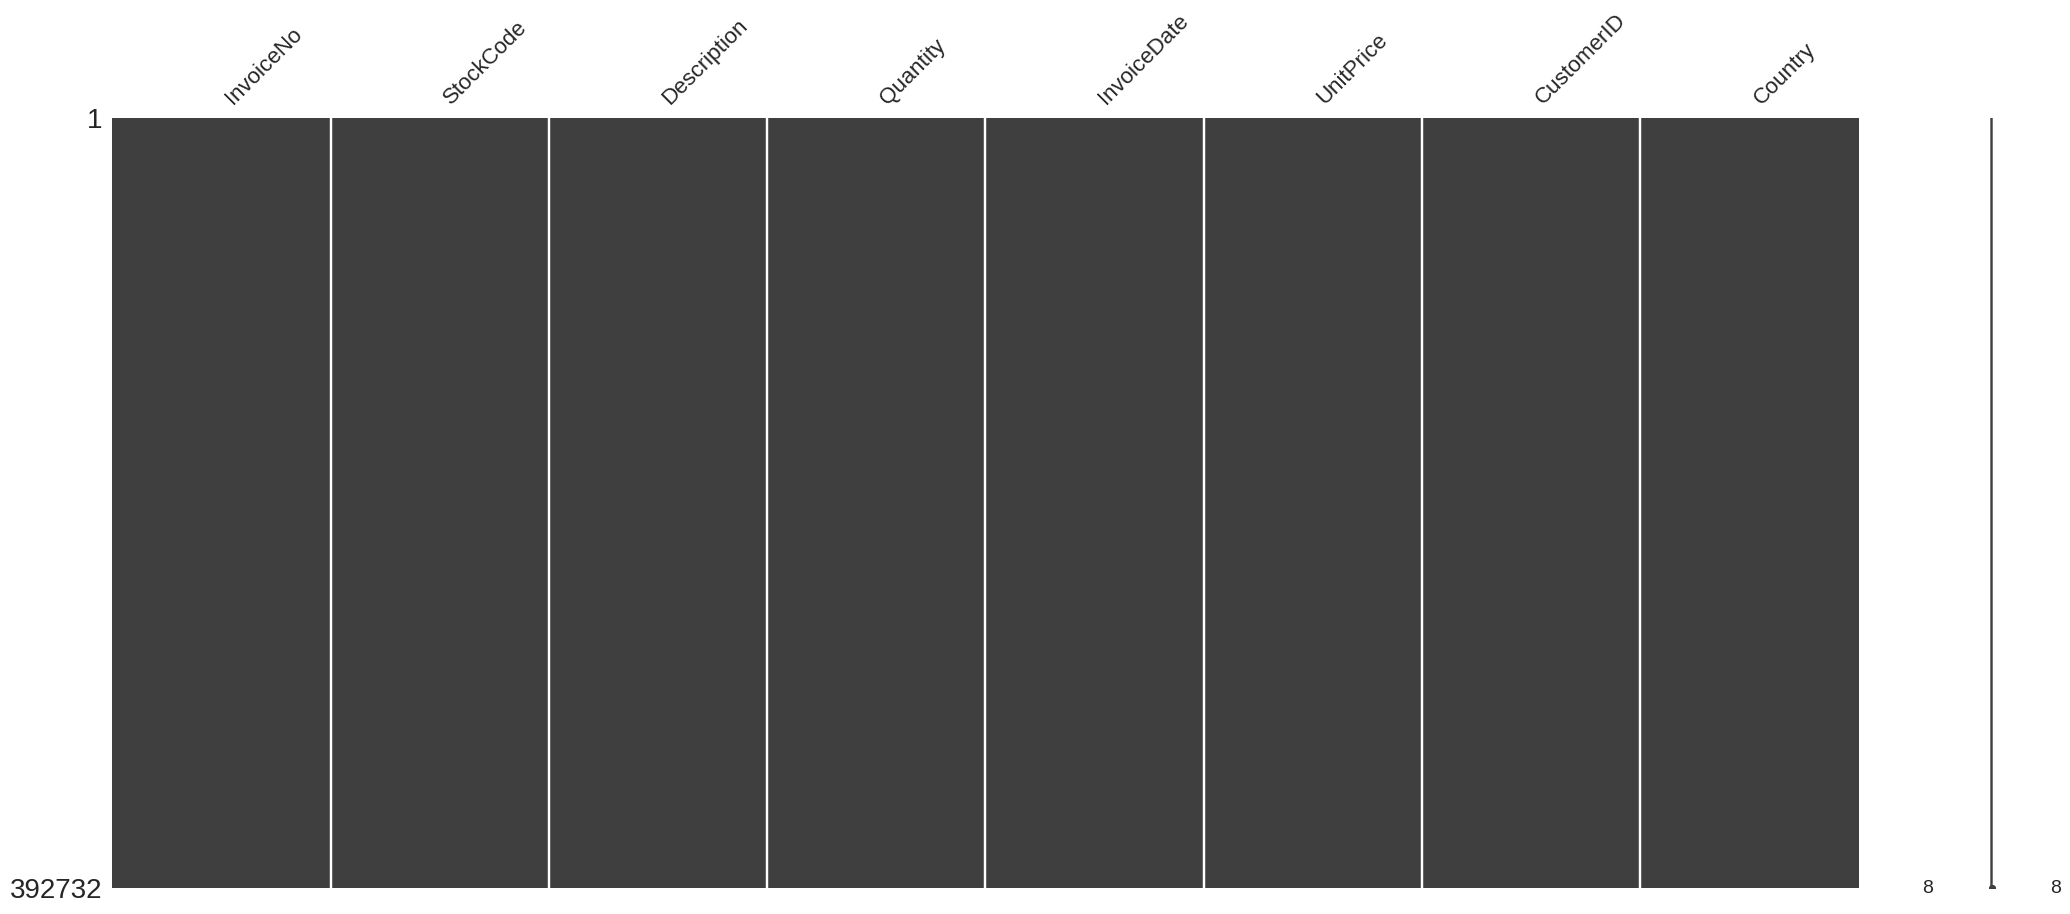

In [ ]:
# Visualizing the missing values
import missingno as msno
msno.matrix(df)
plt.show()

### What did you know about your dataset?

Answer Here

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [ ]:
# Dataset Describe
df.describe(include = 'all')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
count,392732,392732,392732,392732.000000,392732,392732.000000,392732.000000,392732
unique,18536,3665,3877,NaN,17286,NaN,NaN,37
top,576339,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,11/14/11 15:27,NaN,NaN,United Kingdom
freq,542,2023,2016,NaN,542,NaN,NaN,349227
mean,NaN,NaN,NaN,13.153718,NaN,3.125596,15287.734822,NaN
std,NaN,NaN,NaN,181.588420,NaN,22.240725,1713.567773,NaN
min,NaN,NaN,NaN,1.000000,NaN,0.000000,12346.000000,NaN
25%,NaN,NaN,NaN,2.000000,NaN,1.250000,13955.000000,NaN
50%,NaN,NaN,NaN,6.000000,NaN,1.950000,15150.000000,NaN
75%,NaN,NaN,NaN,12.000000,NaN,3.750000,16791.000000,NaN


### Variables Description 

**InvoiceNo**: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.

**StockCode**: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.

**Description**: Product (item) name. Nominal.

**Quantity**: The quantities of each product (item) per transaction. Numeric.

**InvoiceDate**: Invice Date and time. Numeric, the day and time when each transaction was generated.

**UnitPrice**: Unit price. Numeric, Product price per unit in sterling.

**CustomerID**: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.

**Country**: Country name. Nominal, the name of the country where each customer resides.

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
for i in dataset.columns:
  print(f"Unique {i}'s count:{dataset[i].nunique()}\n--------------------------------------------------------------")

Unique InvoiceNo's count:25900
--------------------------------------------------------------
Unique StockCode's count:4070
--------------------------------------------------------------
Unique Description's count:4223
--------------------------------------------------------------
Unique Quantity's count:722
--------------------------------------------------------------
Unique InvoiceDate's count:23260
--------------------------------------------------------------
Unique UnitPrice's count:1630
--------------------------------------------------------------
Unique CustomerID's count:4372
--------------------------------------------------------------
Unique Country's count:38
--------------------------------------------------------------


## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Converting string Object in datetime object
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'],format='%m/%d/%y %H:%M')

In [ ]:
# Create three new columns named year, month, day from InvoiceDate
df['year']= df['InvoiceDate'].dt.year
df['month']= df['InvoiceDate'].dt.month
df['day']= df['InvoiceDate'].dt.weekday
df['hour'] = df['InvoiceDate'].dt.hour

In [ ]:
# Create a new feature named TotalAmount
df['TotalAmount'] = df['UnitPrice'] * df['Quantity']

In [ ]:
# Creating a dataframe form cancel orders
cancelled_orders_df = dataset[dataset['InvoiceNo'].str.contains('C')]

In [ ]:
# Converting string Object in datetime object in cancelled_orders_df for anaylsis
cancelled_orders_df['InvoiceDate'] = pd.to_datetime(cancelled_orders_df['InvoiceDate'],format='%m/%d/%y %H:%M')

# creating on feature named weekday and extracting day number.
cancelled_orders_df['day'] = cancelled_orders_df['InvoiceDate'].dt.weekday

In [ ]:
# getting the number of cancelled orders based on weekday 
cancelled_orders_by_day = cancelled_orders_df.day.value_counts().reset_index().rename(columns = {'index':'day','day':'cancelled_orders'})
cancelled_orders_by_day.head()

,day,cancelled_orders
0,3,2355
1,1,1748
2,2,1729
3,0,1620
4,4,1371


In [ ]:
# Number of orders cancel from each country
cdf = cancelled_orders_df.Country.value_counts().reset_index().rename(columns = {'index':'country','Country':'cancelled_orders'})
cdf.head()

,country,cancelled_orders
0,United Kingdom,7856
1,Germany,453
2,EIRE,302
3,France,149
4,USA,112


In [ ]:
# Printing start and end date
print(df.InvoiceDate.min())
print(df.InvoiceDate.max())

2010-12-01 08:26:00
2011-12-09 12:50:00


In [ ]:
# getting Number of orders cancels for each product
cancel_o = cancelled_orders_df['Description'].value_counts().reset_index().rename(columns = {'index':'Description','Description':'cancelled_orders'})
cancel_o.head()

,Description,cancelled_orders
0,Manual,244
1,REGENCY CAKESTAND 3 TIER,181
2,POSTAGE,126
3,JAM MAKING SET WITH JARS,87
4,Discount,77


In [ ]:
# getting customers who cancel most number of orders 
most_c_orders = cancelled_orders_df.CustomerID.value_counts().reset_index().rename(columns = {'index':'CustomerID','CustomerID':'cancelled_orders'})
most_c_orders.head()

,CustomerID,cancelled_orders
0,14911.0,226
1,17841.0,136
2,17511.0,113
3,15311.0,112
4,12607.0,101


In [ ]:
# getting popular products based on number of orders 
item_p = df['Description'].value_counts().sort_values(ascending = False).reset_index()
item_p.rename(columns={'index':'Description','Description':'popularity'},inplace= True)
item_p.head()

,Description,popularity
0,WHITE HANGING HEART T-LIGHT HOLDER,2016
1,REGENCY CAKESTAND 3 TIER,1714
2,JUMBO BAG RED RETROSPOT,1615
3,ASSORTED COLOUR BIRD ORNAMENT,1395
4,PARTY BUNTING,1390


In [ ]:
# getting popular products based on number of quantity
item_q = df.groupby(['Description'])['Quantity'].sum().sort_values(ascending = False).reset_index()
item_q.head()

,Description,Quantity
0,"PAPER CRAFT , LITTLE BIRDIE",80995
1,MEDIUM CERAMIC TOP STORAGE JAR,77916
2,WORLD WAR 2 GLIDERS ASSTD DESIGNS,54319
3,JUMBO BAG RED RETROSPOT,46078
4,WHITE HANGING HEART T-LIGHT HOLDER,36706


In [ ]:
# getting customer who spend the Highest
t = df[['CustomerID','TotalAmount']]
top_c = t.groupby(['CustomerID'])['TotalAmount'].sum().reset_index().sort_values(by = 'TotalAmount',ascending = False)
top_c = top_c.reset_index()
top_c.drop('index',axis = 1,inplace = True)
top_c.head()

,CustomerID,TotalAmount
0,14646.0,280206.02
1,18102.0,259657.30
2,17450.0,194390.79
3,16446.0,168472.50
4,14911.0,143711.17


In [ ]:
# getting top cuntry based on amount spend by customers and quantity orderd.
country_df = df.groupby(['Country']).agg({'TotalAmount':'sum','Quantity':'sum'}).reset_index().rename(columns = {'Country':'country_name'}).sort_values(by ='TotalAmount',ascending=False)
country_df.head()

,country_name,TotalAmount,Quantity
35,United Kingdom,7285024.644,4254037
23,Netherlands,285446.340,200937
10,EIRE,265262.460,140383
14,Germany,228678.400,119156
13,France,208934.310,111429


In [ ]:
# getting top peforming items in the United Kingdom	
Top_uk_items = df[df['Country']=='United Kingdom'].groupby(['Description'])['Quantity','TotalAmount'].sum().sort_values(by ='Quantity', ascending = False)
Top_uk_items.head()

,Quantity,TotalAmount
Description,,
"PAPER CRAFT , LITTLE BIRDIE",80995,168469.60
MEDIUM CERAMIC TOP STORAGE JAR,76919,80291.44
WORLD WAR 2 GLIDERS ASSTD DESIGNS,49086,12109.96
JUMBO BAG RED RETROSPOT,41878,77191.33
WHITE HANGING HEART T-LIGHT HOLDER,34630,94805.50


In [ ]:
# getting top country based on orders 
country_orders = df.Country.value_counts().sort_values(ascending = False).reset_index().rename(columns = {'index':'country','Country':'orders'})
country_orders.head()

,country,orders
0,United Kingdom,349227
1,Germany,9027
2,France,8327
3,EIRE,7228
4,Spain,2480


In [ ]:
# getting number of orders by years
year_df = df.year.value_counts().reset_index().rename(columns = {'index':'year','year':'orders_counts'})
year_df

,year,orders_counts
0,2011,367059
1,2010,25673


In [ ]:
# getting number of orders by month
month_df = df.month.value_counts().reset_index().rename(columns = {'index':'month','month':'total_orders'})
month_df.head()

,month,total_orders
0,11,63182
1,10,48796
2,12,42699
3,9,39671
4,5,28075


In [ ]:
# getting number of orders by weekday
day_df = df.day.value_counts().reset_index().rename(columns = {'index':'day','day':'total_orders'})
day_df

,day,total_orders
0,3,79260
1,2,68043
2,1,65747
3,0,64237
4,6,61214
5,4,54231


In [ ]:
# getting number of orders by hours
hour_df = df.hour.value_counts().reset_index().rename(columns = {'index':'hour','hour':'total_orders'})
hour_df.head()

,hour,total_orders
0,12,70942
1,13,63024
2,14,53260
3,11,48373
4,15,44793


### What all manipulations have you done and insights you found?

Answer Here.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

In [ ]:
# creating a fuction for ploting bar graph.
def barplot(df):
    plt.figure(figsize=(10,6))
    ax = sns.barplot(data=df,x = df.iloc[:,0],y= df.iloc[:,1])
    plt.title(f"Total orders by {df.columns[0]}")
    plt.show()

In [ ]:
# creating a fuction for ploting bar graph.
def B_plot(df):
    plt.figure(figsize=(10,5))
    ax = sns.barplot(data=df,x = df.iloc[:,0],y= df.iloc[:,1])
    plt.title(f"Distribution based on {df.columns[0]} and {df.columns[1]}")
    plt.xticks(rotation=90);
    plt.show()

#### Chart - 1

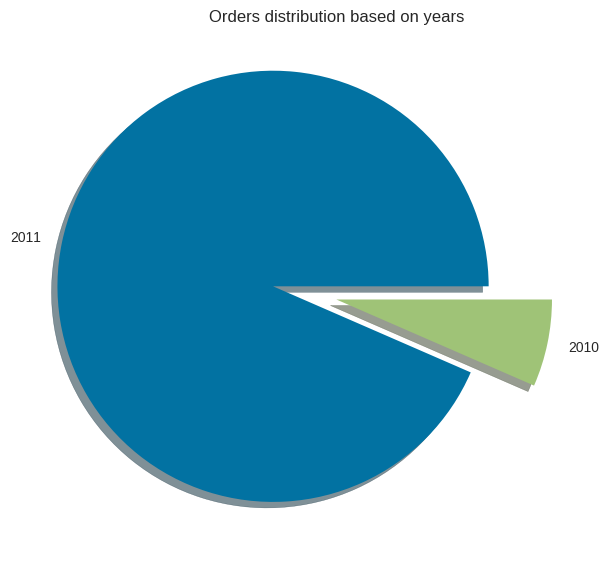

In [ ]:
# Chart - 1 visualization code
myexplode = [0.3, 0]
mylabels = ['2011', "2010"]
fig = plt.figure(figsize =(10, 7))
plt.pie(year_df['orders_counts'], labels = mylabels, explode = myexplode, shadow = True)
plt.title("Orders distribution based on years")
plt.show() 

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 2

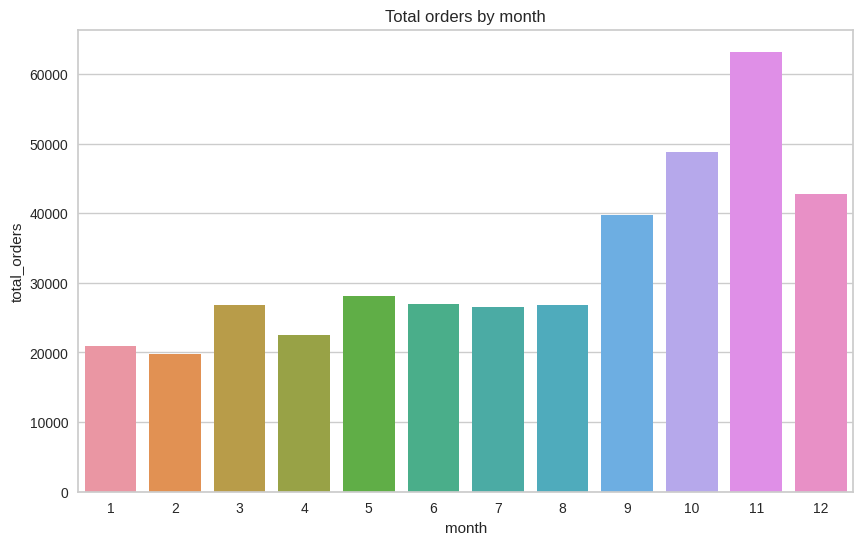

In [ ]:
# Chart - 2 visualization code
barplot(month_df)

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3

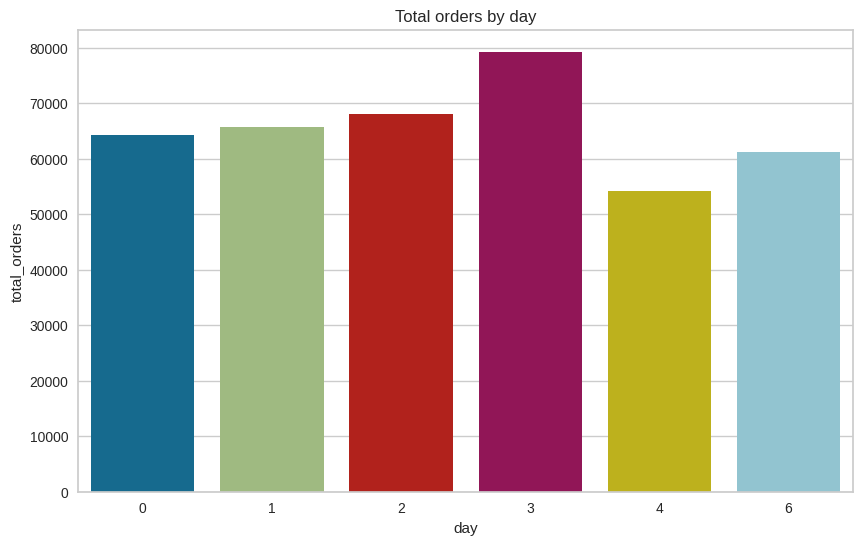

In [ ]:
# Chart - 3 visualization code
barplot(day_df)

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4

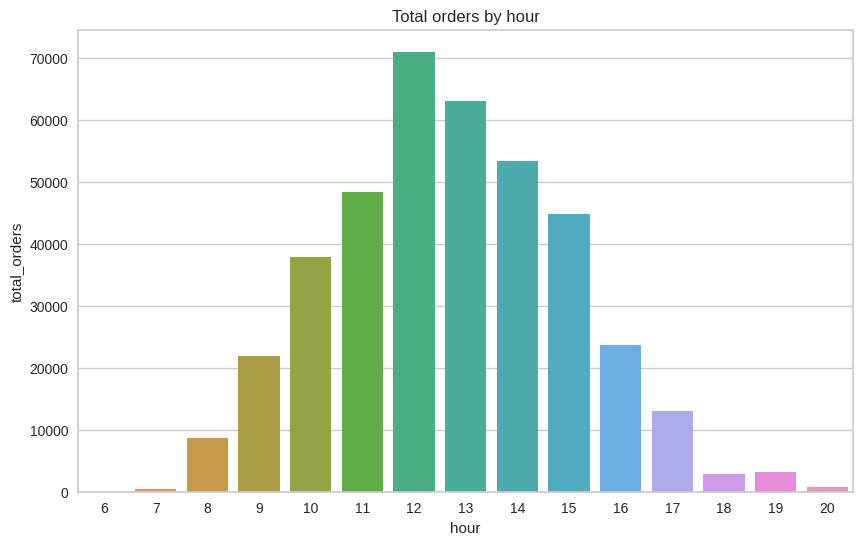

In [ ]:
# Chart - 4 visualization code
barplot(hour_df)


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

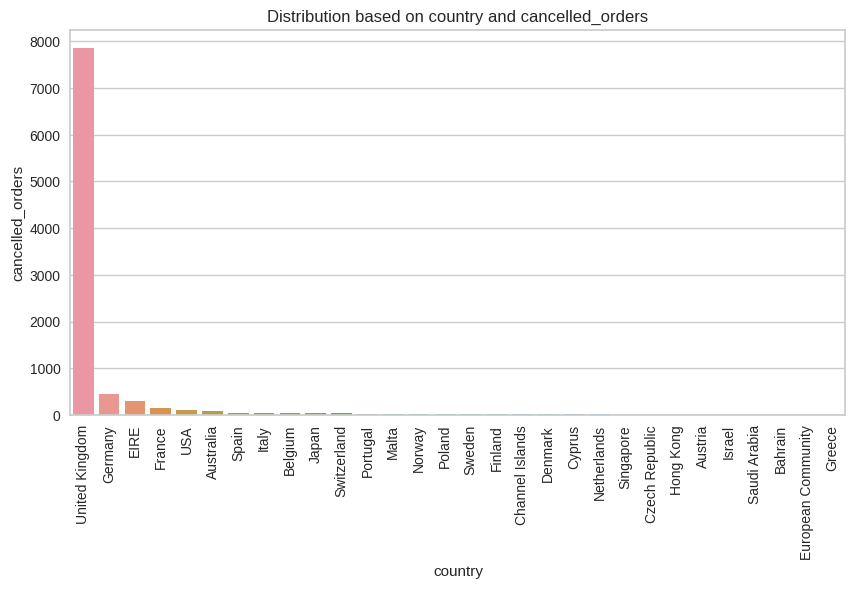

In [ ]:
# Chart - 5 visualization code
B_plot(cdf)

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

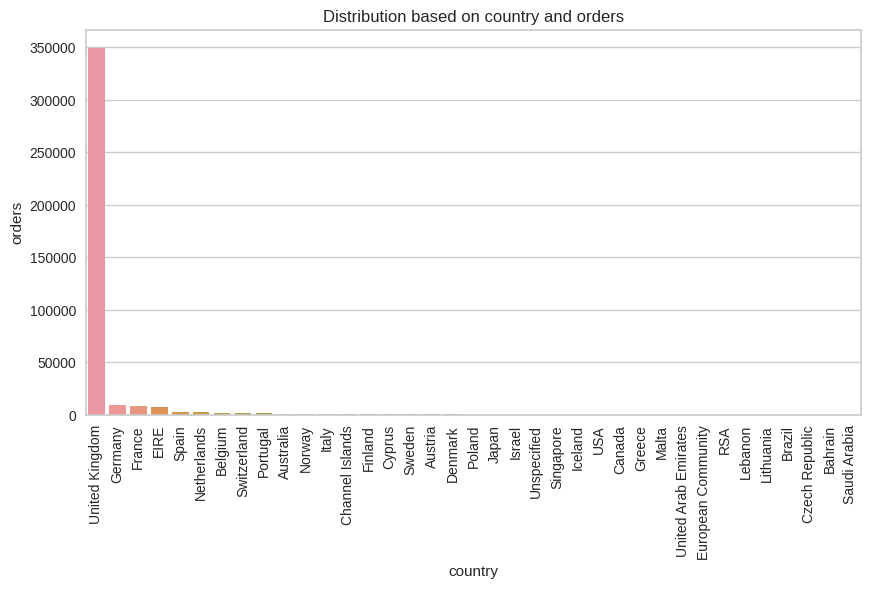

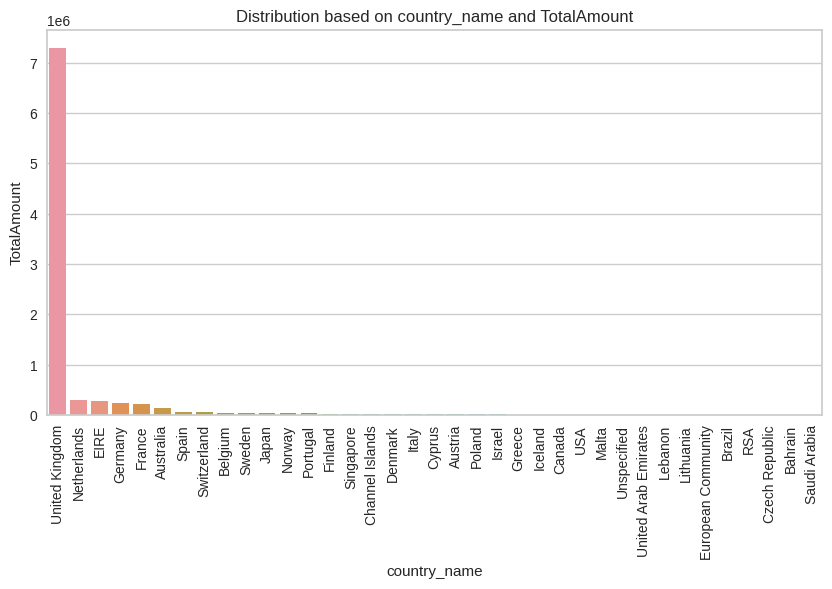

In [ ]:
# Chart - 6 visualization code
B_plot(country_orders)
B_plot(country_df[['country_name','TotalAmount']])

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

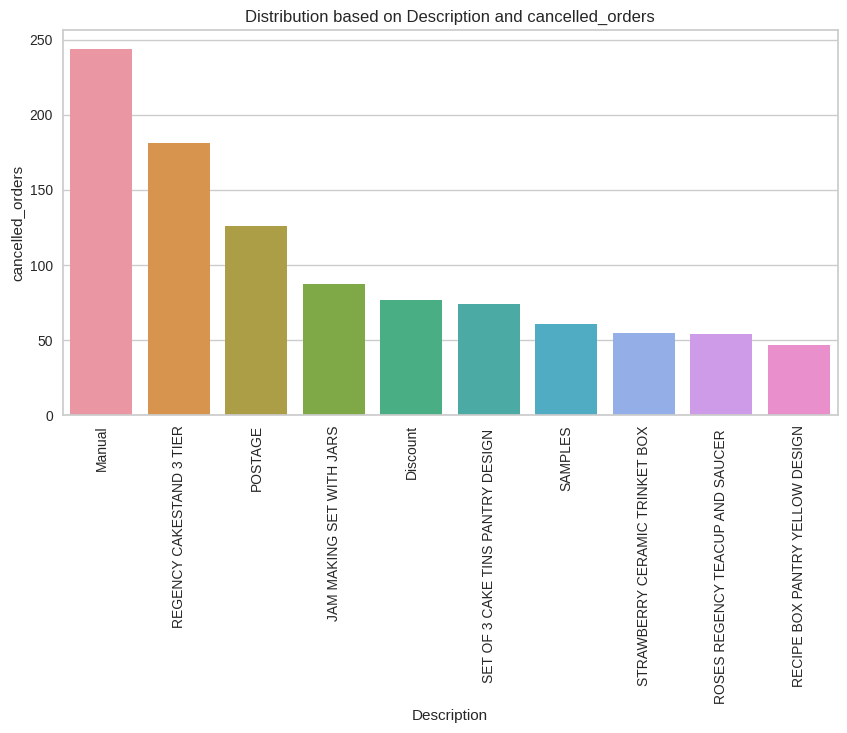

In [ ]:
# Chart - 7 visualization code
B_plot(cancel_o.head(10))

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

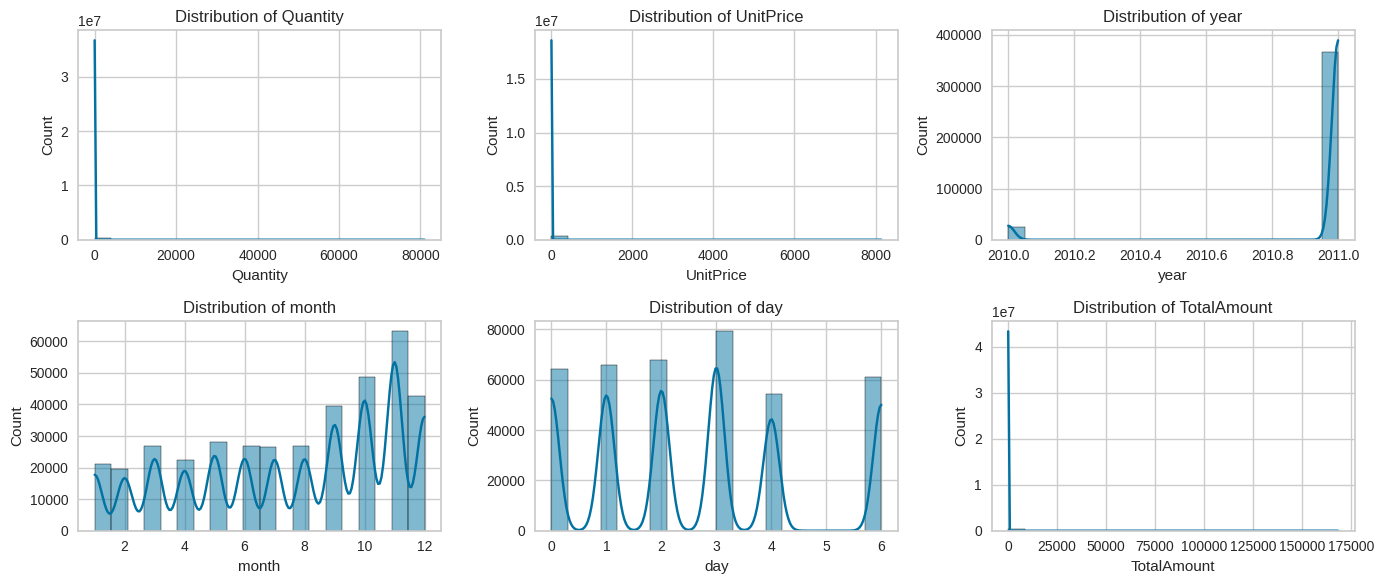

In [ ]:
# Chart - 8 visualization code
numerical_cols = ['Quantity', 'UnitPrice','year', 'month', 'day', 'TotalAmount']
rows=2
cols=3
counter=1
fig = plt.figure(figsize=(14, 6))
for col in numerical_cols:
    plt.subplot(rows,cols,counter)
    sns.histplot(df[col], bins=20, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    counter=counter+1
    plt.tight_layout()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

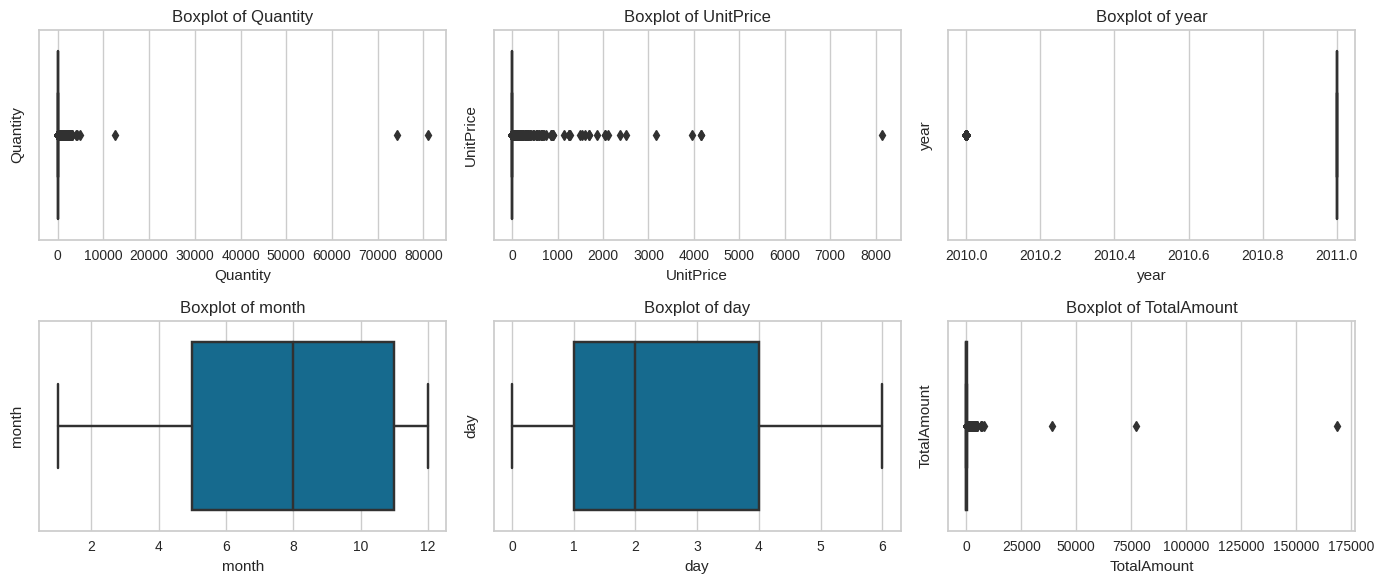

In [ ]:
# Chart - 9 visualization code
rows=2
cols=3
counter=1
fig = plt.figure(figsize=(14, 6))
for col in numerical_cols:
    plt.subplot(rows,cols,counter)
    sns.boxplot(x=col, data=df)
    plt.title(f'Boxplot of {col}')
    plt.ylabel(col)
    counter=counter+1
    plt.tight_layout()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

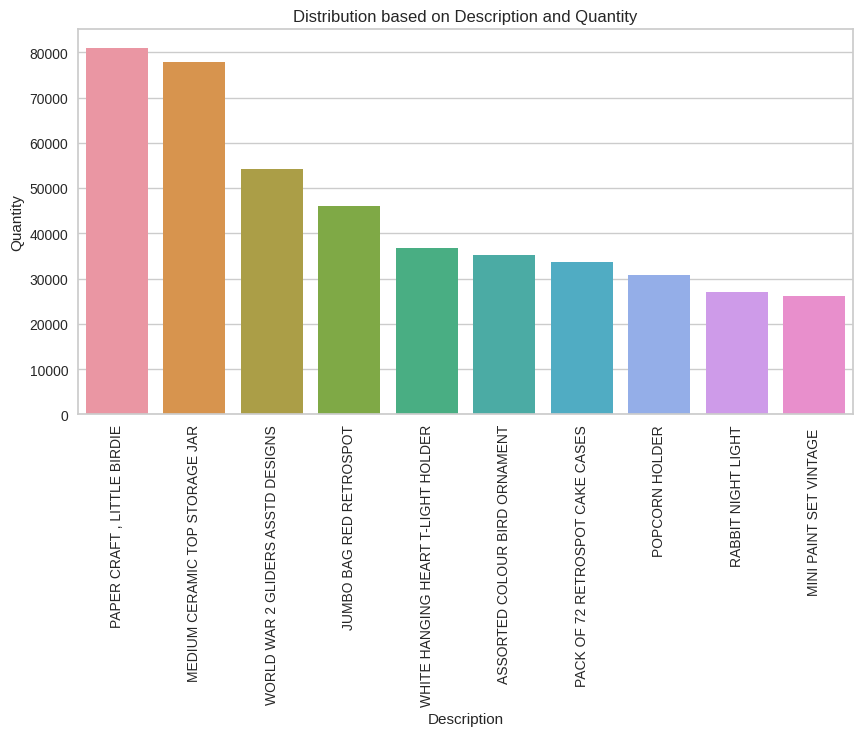

In [ ]:
# Chart - 10 visualization code
B_plot(item_q.head(10))

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

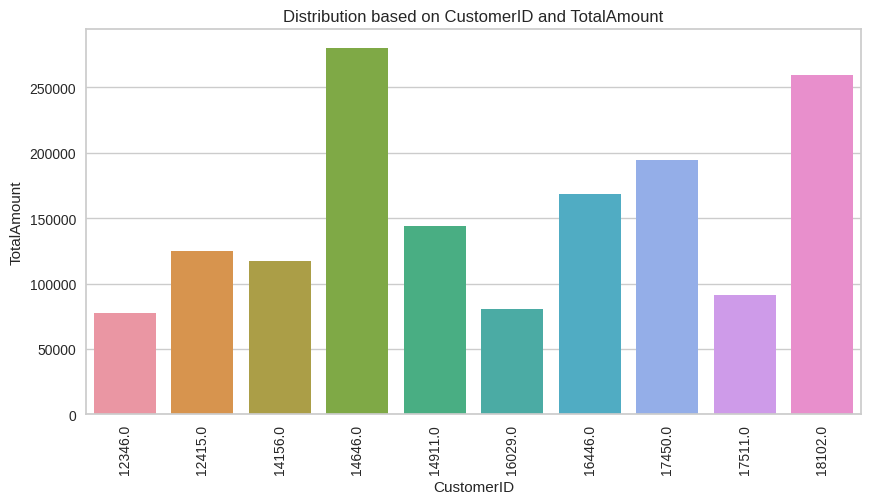

In [ ]:
# Chart - 11 visualization code
B_plot(top_c.head(10))

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

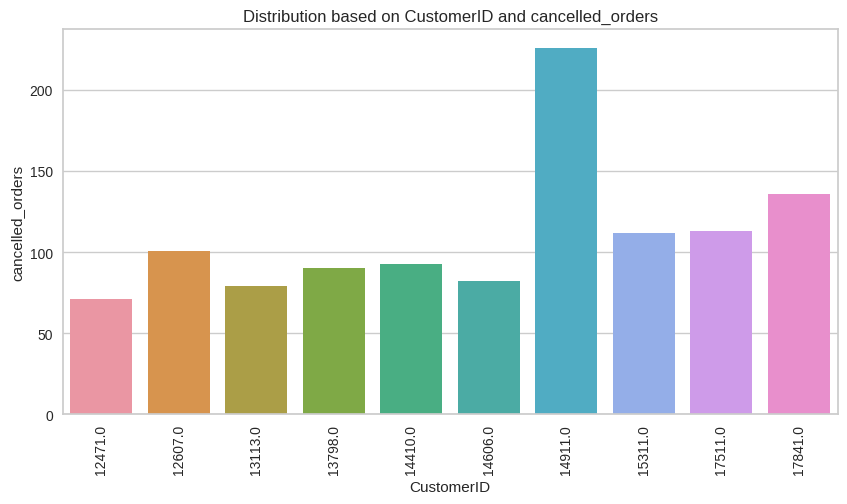

In [ ]:
# Chart - 12 visualization code
B_plot(most_c_orders.head(10))


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [ ]:
# Chart - 13 visualization code
fig = x.scatter(Top_uk_items, x="Quantity", y="TotalAmount", color="Quantity",size='Quantity',trendline="ols")
fig.update_layout(
    title="Correlation between Quantity and Total Amount of items Sold in United Kingdom:",
    autosize=True,
    width=800,
    height=500
)
fig.show()


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

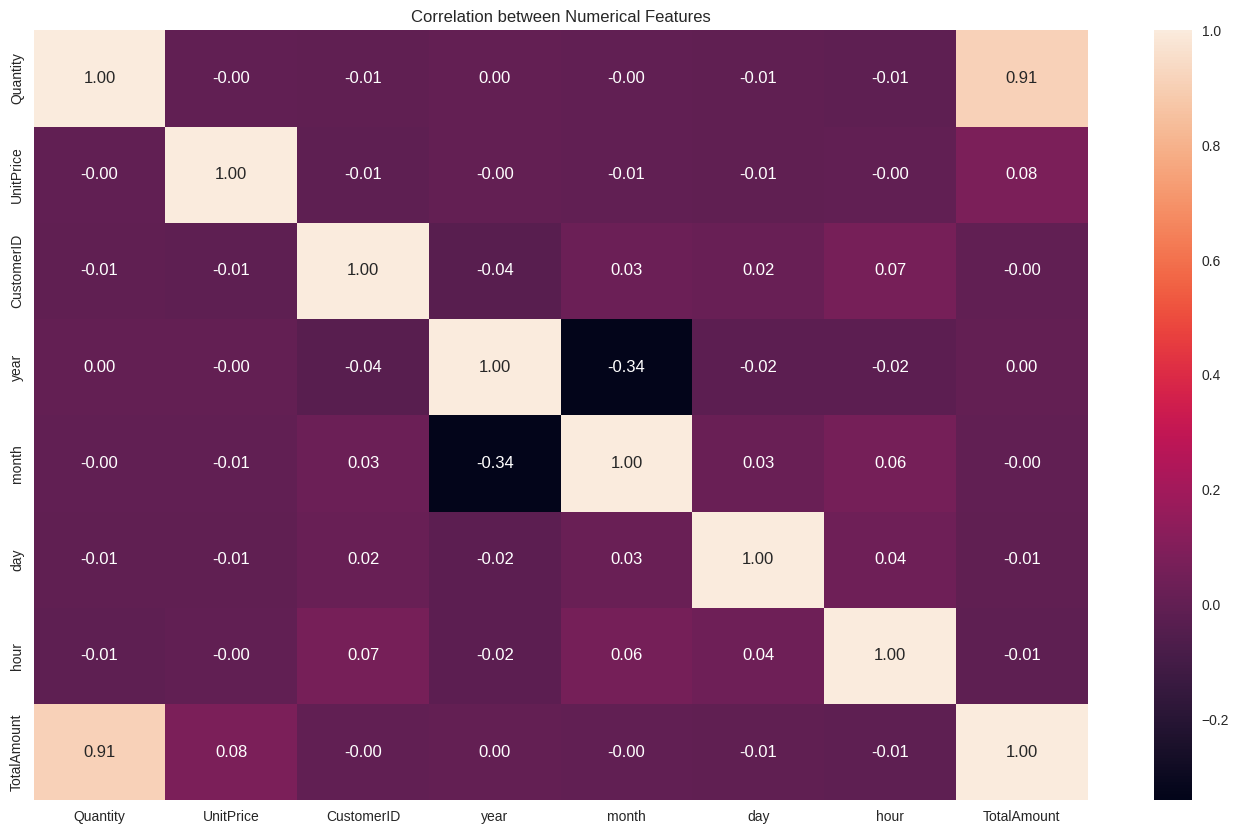

In [ ]:
# Correlation Heatmap visualization code
plt.figure(figsize=(17,10))
sns.heatmap(df.corr(), annot=True, fmt='.2f')
plt.title('Correlation between Numerical Features')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot 

In [ ]:
# Pair Plot visualization code
# sns.pairplot(df)
# plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis (H0): There is no significant difference in the average Quantity purchased by customers who made purchases during different months of the year.

Alternative Hypothesis (H1): There is a significant difference in the average Quantity purchased by customers who made purchases during different months of the year.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

# Group the data by month and calculate the average quantity purchased
month_groups = df.groupby('month')
month_avg_qty = month_groups['Quantity'].mean()

# Perform one-way ANOVA test
f_stat, p_value = stats.f_oneway(*[group['Quantity'] for name, group in month_groups])

# Print the results
if p_value < 0.05:
    print('We are rejecting null hypothesis.')
else:
    print('We are accepting null hypothesis.')

We are rejecting null hypothesis.


##### Which statistical test have you done to obtain P-Value?

One-way ANOVA Test 

##### Why did you choose the specific statistical test?

One-way ANOVA is a statistical technique that is frequently employed to examine the distinction between three or more means, and it determines if the variation between groups is significantly greater than the variation within groups. 

In this scenario, we aim to assess if there is a substantial difference in the mean quantity purchased by customers who made purchases in different months of the year. ANOVA is a suitable test since we are comparing multiple months (groups).

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis (H0): There is no significant difference in the average quantity purchased by customers from different countries.

Alternative Hypothesis (H1): There is a significant difference in the average quantity purchased by customers from different countries.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

# Create a list of the unique countries in the dataset
countries = country_df['country_name']

# Create a list to store the data for each country
country_data = []

# Loop through the countries and extract the quantity data for each one
for country in countries:
    country_quantity_data = df[df['Country'] == country]['Quantity']
    country_data.append(country_quantity_data)

# Perform a one-way ANOVA test
f_stat, p_value = stats.f_oneway(*country_data)

# Print the results
if p_value < 0.05:
    print('We are rejecting null hypothesis.')
else:
    print('We are accepting null hypothesis.')

We are rejecting null hypothesis.


##### Which statistical test have you done to obtain P-Value?

One-way ANOVA Test 

##### Why did you choose the specific statistical test?

To compare the means of the average quantity purchased by customers from different countries, a one-way ANOVA test is utilized in this case. ANOVA is suitable for comparing means of more than two groups (in this case, multiple countries) and determining whether their means are significantly different from each other.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis (H0): There is no significant difference in the proportion of cancelled orders between different days of the week.

Alternative Hypothesis (H1): There is a significant difference in the proportion of cancelled orders between different days of the week.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

# creating a table haveing weekdays ,cancelled order and total non_cancelled order 
table = pd.merge(cancelled_orders_by_day, day_df, on='day')
table.columns = ['DayOfWeek', 'Cancelled', 'Total']

# perform the chi-square test
chi2, p_value, dof, expected = chi2_contingency([table['Cancelled'], table['Total']])

# Print the results
if p_value < 0.05:
    print('We are rejecting null hypothesis.')
else:
    print('We are accepting null hypothesis.')

We are rejecting null hypothesis.


##### Which statistical test have you done to obtain P-Value?

chi-square test

##### Why did you choose the specific statistical test?

The chi-square test is a statistical tool that helps determine whether there is a significant relationship between two categorical variables. In this specific case, we created a contingency table by grouping the cancelled and not-cancelled orders by the day of the week. By applying the chi-square test to this table, we can determine whether there is a significant association between the day of the week and the number of cancelled orders.

# ***6. Feature Engineering & Data Pre-processing***

## 1. **RFM Analysis**

RFM analysis is a powerful marketing technique that segments customers based on their **recency** (time since last purchase), **frequency** (number of purchases), and **monetary** (amount spent) of their transactions. By analyzing these three metrics together, businesses can gain a better understanding of their customers and make data-driven decisions about marketing and customer engagement. RFM analysis helps businesses identify their high-value customers, as well as those who may be at risk of churn, and develop targeted marketing strategies to retain or re-engage them. Overall, RFM analysis is an effective way for businesses to optimize their marketing efforts and increase customer loyalty and satisfaction.

In [ ]:
# Recency = Latest Date - Last Inovice Data, Frequency = count of invoice no. of transaction(s), Monetary = Sum of Total 
#Amount for each customer
import datetime as dt

#This is to calculate the number of days from recent purchase
Latest_Date = max(df['InvoiceDate'])

#Create RFM Modelling scores for each customer
rfm_df = df.groupby('CustomerID').agg({'InvoiceDate': lambda x: (Latest_Date - x.max()).days, 'InvoiceNo': lambda x: len(x), 'TotalAmount': lambda x: x.sum()}).reset_index()

#Convert Invoice Date into type int

#Rename column names to Recency, Frequency and Monetary
rfm_df.rename(columns={'InvoiceDate': 'Recency', 
                         'InvoiceNo': 'Frequency', 
                         'TotalAmount': 'Monetary'}, inplace=True)

# Printing the first 5 rows of rfm_df
rfm_df.head()

,CustomerID,Recency,Frequency,Monetary
0,12346.0,325,1,77183.60
1,12347.0,1,182,4310.00
2,12348.0,74,31,1797.24
3,12349.0,18,73,1757.55
4,12350.0,309,17,334.40


### 2. Handling Missing Values & Outliers

In [ ]:
# Handling Outliers & Outlier treatments
'''Missing values and outliers will be addressed during data wrangling stage'''

'Missing values and outliers will be addressed during data wrangling stage'

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

## 3. Categorical Encoding

In [ ]:
# Encode your categorical columns
#checking quantile values for each attribute 
rfm_df.describe()

,CustomerID,Recency,Frequency,Monetary
count,4339.000000,4339.000000,4339.000000,4339.000000
mean,15299.936852,91.518322,90.512100,2048.215924
std,1721.889758,100.009747,225.515328,8984.248352
min,12346.000000,0.000000,1.000000,0.000000
25%,13812.500000,17.000000,17.000000,306.455000
50%,15299.000000,50.000000,41.000000,668.560000
75%,16778.500000,141.000000,98.000000,1660.315000
max,18287.000000,373.000000,7676.000000,280206.020000


In [ ]:
# Creating labels on the basis on quantile values.
rfm_df['r_score'] = pd.qcut(rfm_df['Recency'], q=[0,0.25,0.5,0.75,1], labels = [4,3,2,1])
rfm_df['f_score'] = pd.qcut(rfm_df['Frequency'], q=[0,0.25,0.5,0.75,1], labels = [1,2,3,4])
rfm_df['m_score'] = pd.qcut(rfm_df['Monetary'], q=[0,0.25,0.5,0.75,1], labels = [1,2,3,4])

In [ ]:
# calculating rfm_score by adding the r,f and m scores.
rfm_df['rfm_score'] = rfm_df['r_score'].astype(int) + rfm_df['f_score'].astype(int) + rfm_df['m_score'].astype(int)

In [ ]:
# Creating a function for customer segregation the fuction takes df as name of dataframe and col as rfm_score.
def customers_type(df, col):
    c = len(df[(df[col] >= 10) & (df[col] <= 12)])
    p = len(df[(df[col] >= 7) & (df[col] <= 9)])
    n = len(df[(df[col] >= 5) & (df[col] <= 6)])
    l = len(df[df[col] < 5])
    return [c, p, n, l]

In [ ]:
# applying function for customers segregation
customer_list = customers_type(rfm_df, 'rfm_score')

In [ ]:
# Printing the diffrent customer groups.
print('Champions:', customer_list[0])
print('Potentials:', customer_list[1])
print('Needs Attention:', customer_list[2])
print('Almost lost:', customer_list[3])

Champions: 1263
Potentials: 1332
Needs Attention: 975
Almost lost: 769


**Champions**: Customers with an RFM score between 10-12 are your most valuable customers who are loyal, highly engaged, and contribute a significant amount of revenue to your business.

**Potentials**: Customers with an RFM score between 7-9 are those who have made multiple purchases and spent a good amount of money, They have the potential to become loyal customers with targeted offers and promotions.

**Needs attention**: Customers with an RFM score between 5-6. They can be encouraged to make more purchases and become loyal customers with targeted offers and promotions.

**Almost Lost**: Customers with an RFM score between 3-4 have low scores in all three metrics and have not made a purchase in a long time. They are at risk of being lost and can be targeted with win-back campaigns to encourage them to return and make a purchase.

#### What all categorical encoding techniques have you used & why did you use those techniques?

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation & Feature SelectionFeature Selection

In [ ]:
# Manipulate Features to minimize feature correlation and create new features
'''Not Needed'''

'Not Needed'

### 5. Data Transformation

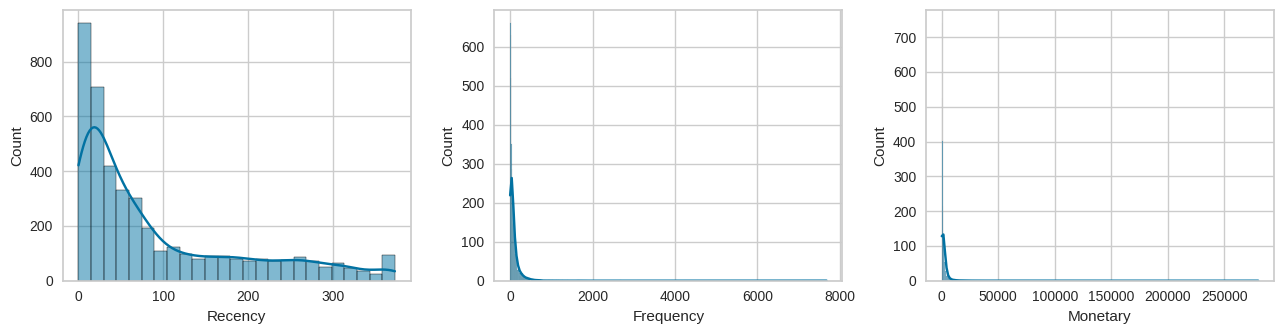

In [ ]:
# Checking distribution of Recency, frequency and monetary values.
rows=1 
cols=3
counter=1
fig = plt.figure(figsize=(13,3.5))
for i in ['Recency', 'Frequency', 'Monetary']:
  plt.subplot(rows,cols,counter)
  sns.histplot((rfm_df[i]),kde=True)
  counter=counter+1
  plt.tight_layout()

In [ ]:
# Applying log transformation on Recency, Frequency and Monetary values.
rfm_df[['Recency', 'Frequency', 'Monetary']] = np.log1p(rfm_df[['Recency', 'Frequency', 'Monetary']])

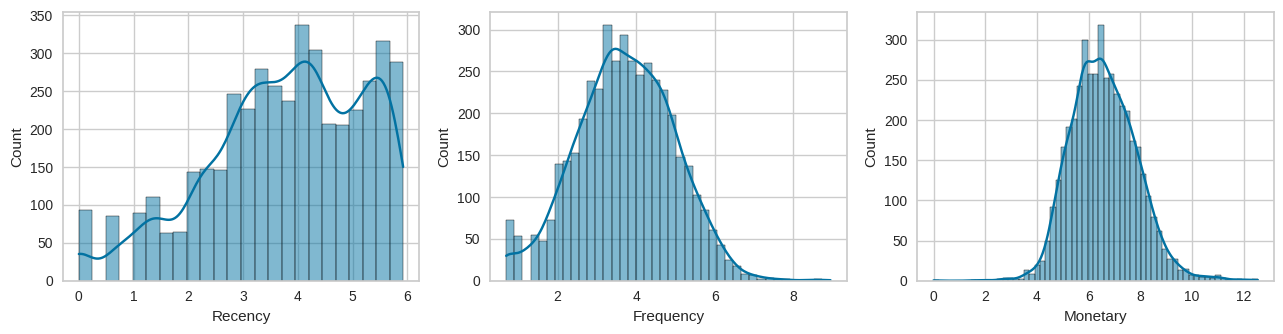

In [ ]:
# Checking distribution of Recency, frequency and monetary values after applying log tranformation.
rows=1 
cols=3
counter=1
fig = plt.figure(figsize=(13,3.5))
for i in ['Recency', 'Frequency', 'Monetary']:
  plt.subplot(rows,cols,counter)
  sns.histplot((rfm_df[i]),kde=True)
  counter=counter+1
  plt.tight_layout()

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

### 6. Data Scaling

In [ ]:
# Scaling your data
X = rfm_df[['Recency', 'Frequency', 'Monetary']]

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X.values)

##### Which method have you used to scale you data and why?

## ***7. ML Model Implementation***

In [ ]:
def plot_clusters_3d(X, centers, labels):
    """
    Plots clusters with centers.

    Parameters:
    -----------
    X : numpy array
        Data points to be plotted.
    centers : numpy array
        Cluster centers to be plotted.
    labels : numpy array
        Cluster labels for data points.

    Returns:
    -------- 
    3D scatter plot of the data points and cluster centers.
    """

    # Create Plotly figure object
    fig = go.Figure()

    # Data points
    fig.add_trace(go.Scatter3d(x=X[:, 0], y=X[:, 1], z=X[:, 2],mode='markers',
        marker=dict(color=labels,colorscale='Rainbow',opacity=0.5,size=3),
        name='Data Points'
    ))

    # Cluster centers
    fig.add_trace(go.Scatter3d(x=centers[:, 0], y=centers[:, 1], z=centers[:, 2],mode='markers',
        marker=dict(color=['cyan', 'black', 'red', 'blue'],size=8,symbol='diamond'),
        name='Cluster Centers'
    ))

    # Set axis labels and title
    fig.update_layout(scene=dict(xaxis_title='Recency',yaxis_title='Frequency',zaxis_title='Monetary',
            aspectratio=dict(x=1, y=1, z=0.7),camera=dict(up=dict(x=0, y=0, z=1),eye=dict(x=1.5, y=-1.5, z=1))),
        title='Customer Segmentation based on Recency, Frequency, and Monetary'
    )

    return fig

In [ ]:
def plot_clusters(X, labels):
    """
    Plots clusters without centers.

    Parameters:
    -----------
    X : numpy array
        Data points to be plotted.
    labels : numpy array
        Cluster labels for data points.

    Returns:
    -------- 
    3D scatter plot of the data points and cluster centers.
    """
    fig = go.Figure()

    fig.add_trace(go.Scatter3d(x=X[:, 0], y=X[:, 1], z=X[:, 2],mode='markers', marker=dict(color= labels, colorscale='Rainbow', opacity=0.7, size=2.5),
        name='Data Points'))

    fig.update_layout(scene=dict(xaxis_title='Recency', yaxis_title='Frequency', zaxis_title='Monetary', aspectratio=dict(x=1, y=1, z=0.7), camera=dict(up=dict(x=0, y=0, z=1),
        eye=dict(x=1.5, y=-1.5, z=1))), title='Customer Segmentation based on Recency, Frequency, and Monetary')

    return fig

#**K-Means Clustering**

## Applying Elbow and Silhouette Method on X for finding the number of clusters. 

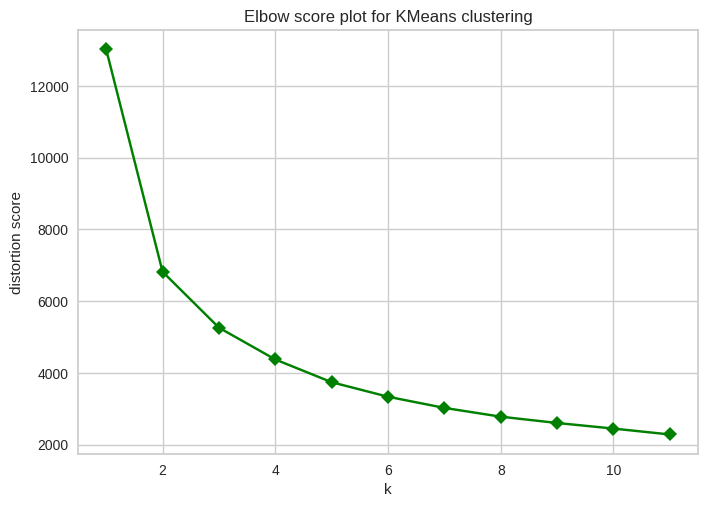

In [ ]:
# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,12), metric='distortion', timings=False, locate_elbow=False, title='Elbow score plot for KMeans clustering')

# Fit the data to the visualizer
visualizer.fit(X)        
visualizer.finalize()
elbow_line = visualizer.ax.lines[0]
elbow_line.set_color('green')        

SilhouetteVisualizer(ax=<Axes: >, estimator=KMeans(n_clusters=11))

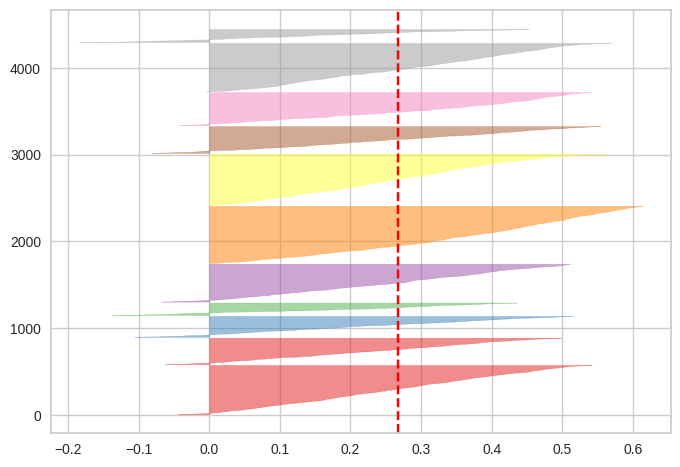

In [ ]:
# Instantiate the SilhouetteVisualizer
visualizer = SilhouetteVisualizer(model, k=(2,12), metric='silhouette', timings=False, locate_elbow=False)

# Fit the data to the visualizer
visualizer.fit(X) 

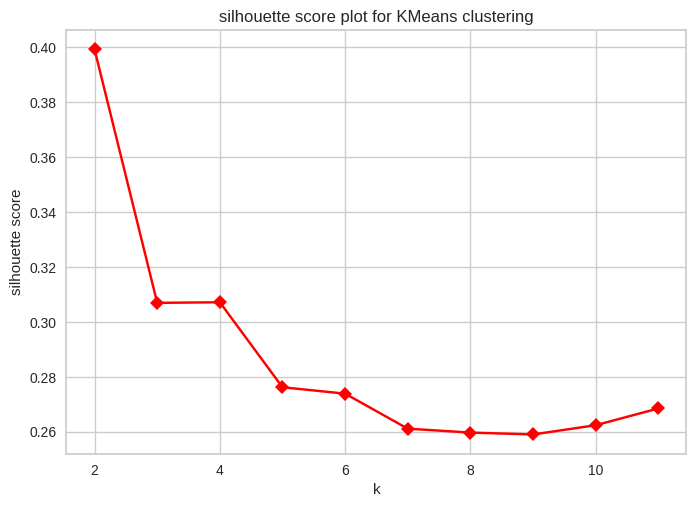

In [ ]:
# Instantiate the KElbowVisualizer for visualize the elbow plot for silhouette metric.
visualizer = KElbowVisualizer(model, k=(2,12), metric='silhouette', timings=False, locate_elbow=False,title='silhouette score plot for KMeans clustering')

# Fit the data to the visualizer
visualizer.fit(X)
visualizer.finalize()
elbow_line = visualizer.ax.lines[0]
elbow_line.set_color('red')

## *K-Means Clustering ML Model Implementation*

In [ ]:
# Define number of clusters
''' Through the application elbow and sihoutte scores the optimal number of clusters 
for representing the underlying structure of the data has been determined to be 4.'''
clusters = 4

# Instantiate k-means object
km_model = KMeans(n_clusters= 4)

# Fit the model to the data
km_model.fit(X)

# Get cluster labels for each data point
km_labels = km_model.labels_

# Get cluster centers
km_centers = km_model.cluster_centers_

# Output results
print('Cluster labels:', km_labels[:300])
print('Cluster centers:', km_centers)

Cluster labels: [0 1 0 0 3 0 3 0 3 0 1 2 1 0 3 1 3 1 3 2 0 0 0 3 2 2 0 0 0 1 1 0 2 3 1 0 2
 0 0 1 0 0 0 3 3 3 0 1 0 0 0 3 0 0 3 1 1 0 0 2 0 1 0 0 3 2 1 1 3 1 0 1 0 0
 3 1 1 3 2 1 3 0 3 2 1 3 1 2 0 0 0 0 0 0 0 0 0 2 2 0 1 1 1 1 0 1 1 2 2 1 1
 1 1 2 3 1 2 3 3 0 0 2 1 0 0 2 3 0 2 3 0 3 0 0 3 0 1 1 3 0 0 3 1 1 1 3 1 0
 2 2 0 0 1 2 1 1 0 2 0 0 3 3 0 3 2 1 0 1 2 3 1 3 1 3 3 3 1 1 2 2 3 3 0 0 1
 3 3 3 3 1 1 0 2 2 3 2 0 3 3 3 0 0 1 1 0 0 3 3 2 3 0 0 0 0 0 0 3 1 0 2 2 1
 0 1 3 3 0 0 1 1 2 2 0 0 0 1 2 3 0 3 0 0 3 0 2 1 3 0 2 3 0 0 2 1 2 2 3 2 1
 1 3 0 1 0 1 3 2 0 0 1 0 2 1 1 1 1 1 3 0 0 3 2 0 0 2 0 1 0 2 3 1 1 3 1 1 0
 1 2 1 3]
Cluster centers: [[ 0.32815029  0.39803175  0.37533465]
 [-1.22247508  1.27737687  1.30966025]
 [-0.77192395 -0.24912159 -0.3513928 ]
 [ 0.86220519 -0.96756378 -0.90559656]]


In [ ]:
# Plotting a graph that shows the distribution of customers based on their Recency, Frequency, and Monetary values.
plot_clusters_3d(X,km_centers, km_labels)

In [ ]:
# ploting silhouette_score evaluate the model range (2,12).
for p in range(2, 12):
    kmeans = KMeans(n_clusters=p)
    labels = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, labels)
    print("For n_clusters =", p, ", the average silhouette_score is :", silhouette_avg)

For n_clusters = 2 , the average silhouette_score is : 0.39925729808330224
For n_clusters = 3 , the average silhouette_score is : 0.30740772083702467
For n_clusters = 4 , the average silhouette_score is : 0.30729210231525195
For n_clusters = 5 , the average silhouette_score is : 0.2762392743992789
For n_clusters = 6 , the average silhouette_score is : 0.2736399379073292
For n_clusters = 7 , the average silhouette_score is : 0.26140359518606904
For n_clusters = 8 , the average silhouette_score is : 0.260368736118189
For n_clusters = 9 , the average silhouette_score is : 0.2590414391303976
For n_clusters = 10 , the average silhouette_score is : 0.25398339282586757
For n_clusters = 11 , the average silhouette_score is : 0.27007856699015176


To evaluate the KMeans clustering model, I used the silhouette_score metric. The optimal number of clusters was determined to be 4 based on the optimal silhouette score.

# **Hierarchial Clustering**

## Applying dendrogram on X for finding the number of clusters.

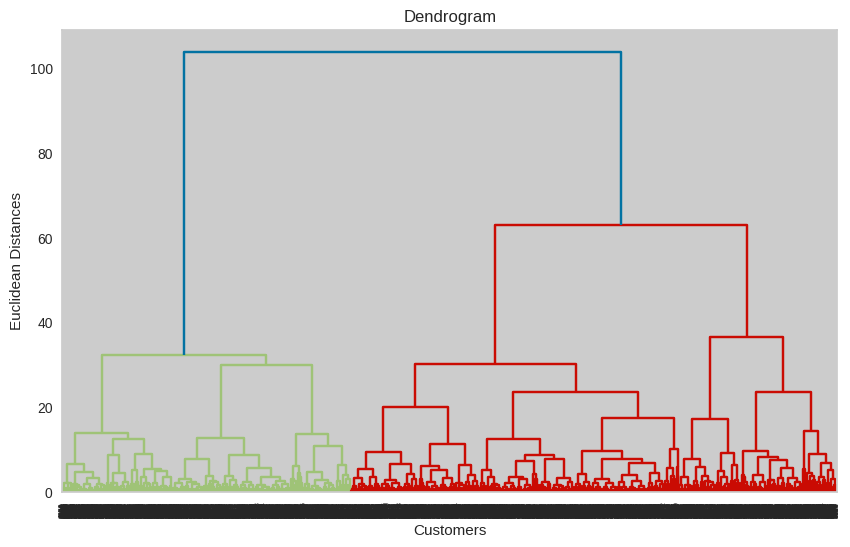

In [ ]:
# create the dendrogram using ward linkage method
plt.figure(figsize=(10,6))
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))

# set the title and labels for the plot
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distances')

# show the dendrogram
plt.show()

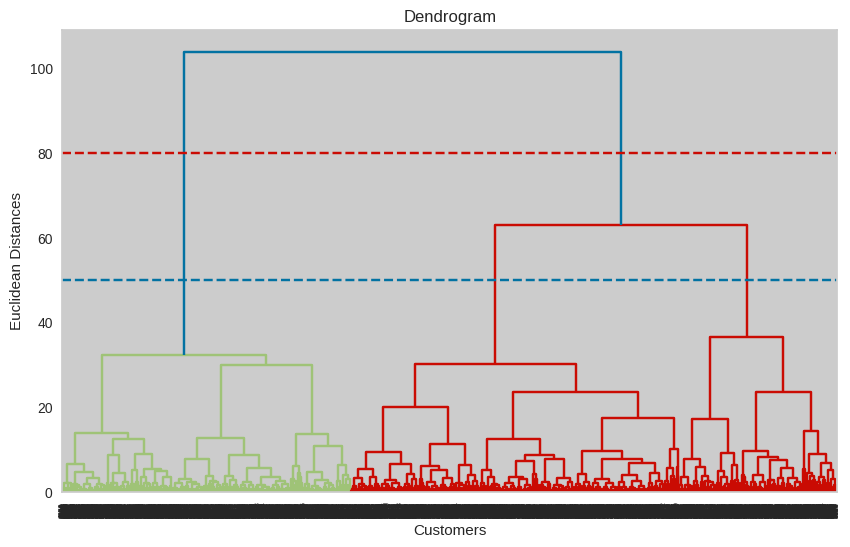

In [111]:
# Using the dendogram to find the optimal number of clusters
plt.figure(figsize=(10,6))
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))

# set the title and labels for the plot
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distances')

# find largest vertical distance we can make without crossing any other horizontal line
plt.axhline(y=80, color='r', linestyle='--')
plt.axhline(y=50, color='b', linestyle='--')
# show the dendrogram
plt.show() 

In [ ]:
# Fitting hierarchical clustering to X

# Define number of clusters
c = 2

# Perform Agglomerative clustering
h_model = AgglomerativeClustering(n_clusters = c, affinity = 'euclidean', linkage = 'ward')

# Get cluster labels for each data point
h_labels = h_model.fit_predict(X)

In [ ]:
# Plotting a graph that shows the distribution of customers based on their Recency, Frequency, and Monetary values.
plot_clusters(X, labels= h_labels)

# **DBSCAN (Density-Based Spatial Clustering of Applications with Noise)**

In [ ]:
# Instantiate DBSCAN object
d_model = DBSCAN()

# Get cluster labels for each data point
d_lable = d_model.fit_predict(X)

In [ ]:
# Plotting a graph that shows the distribution of customers based on their Recency, Frequency, and Monetary values on default parameters
plot_clusters(X, labels= d_lable)

In [105]:
# Create two numpy array for perform Hyperparameter tuneing  
eps_range = np.arange(0.1, 1.2, 0.1)
min_samples_range = np.arange(2, 8)

# Creating variables to store best hyperparameters
best_eps = None
best_min_samples = None
best_silhouette = -1

# Creating a loop for iterate over every parameter
for eps in eps_range:
    for min_samples in min_samples_range:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        d_labels = dbscan.fit_predict(X)
        silhouette = silhouette_score(X, d_labels)

        if silhouette > best_silhouette:
            best_silhouette = silhouette
            best_eps = eps
            best_min_samples = min_samples
            
# Print best hyperparameters and corresponding scores
print(f"\nBest Hyperparameters: epsilon={best_eps}, min_samples={best_min_samples}")
print(f"Corresponding Silhouette Score: {best_silhouette}")


Best Hyperparameters: epsilon=1.1, min_samples=7
Corresponding Silhouette Score: 0.5839081513715018


In [108]:
# Instantiate DBSCAN object
tuned_d_model = DBSCAN(eps = 1.1, min_samples=7)

# Get cluster labels for each data point
tuned_d_lable = tuned_d_model.fit_predict(X)

In [119]:
# Plotting a graph that shows the distribution of customers based on their Recency, Frequency, and Monetary values on tuned parameters
plot_clusters(X, labels= tuned_d_lable)

##### Which hyperparameter optimization technique have you used and why?

I utilized a brute-force grid search technique for optimizing the hyperparameters, and evaluating the resulting clustering's silhouette score. I chose this approach because it is relatively easy to implement and can be effective when dealing with a manageable number of hyperparameters.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

After applying the tuned hyperparameters, a significant improvement has been observed in its performance. 

# **Gaussian Mixture Model (GMM)**

In [116]:
# Define number of clusters
''' Through the application elbow and sihoutte scores the optimal number of clusters 
for representing the underlying structure of the data has been determined to be 4.'''
clusters = 4

# Initialize GMM model
gmm = GaussianMixture(n_components=clusters)

# Fit the model on data
gmm.fit(X)

# Get predicted cluster labels for data
g_labels = gmm.predict(X)

In [ ]:
# Plotting a graph that shows the distribution of customers based on their Recency, Frequency, and Monetary values.
plot_clusters(X, labels= g_labels)

In [118]:
# define a range of components for computeing the bic score.
n_components_range = range(1, 10)

#intalize the lowest_bic
lowest_bic = np.infty

for n_components in n_components_range:
    gmm = GaussianMixture(n_components=n_components)
    gmm.fit(X)

    # Calculate BIC scores
    bic = gmm.bic(X)
    
    # Update variables if a lower score is found
    if bic < lowest_bic:
        lowest_bic = bic

    print(f"BIC at {n_components}: {lowest_bic}")

BIC at 1: 31837.258718417084
BIC at 2: 31021.809549664624
BIC at 3: 30432.35163491958
BIC at 4: 29855.694494081745
BIC at 5: 29855.694494081745
BIC at 6: 29732.96456502495
BIC at 7: 29732.96456502495
BIC at 8: 29732.96456502495
BIC at 9: 29732.96456502495


To evaluate the Gaussian Mixture Model, I used the BIC scores metric. The optimal number of clusters was determined based of optimal  Bayesian Information Criterion score.

### 1. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***